In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import re
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import StandardScaler

In [44]:
df = pd.read_csv("lc_14to16.csv")
print(df.shape)


C:\Users\Lawry\AppData\Local\Temp\ipykernel_20588\2775945552.py:1: DtypeWarning: Columns (19,59,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("lc_14to16.csv")


(1091131, 151)


In [45]:
# Convert 'issue_d' to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])

# Convert 'int_rate' and 'revol_util' to float
def convert_to_float(x):
    if isinstance(x, str):
        return float(x.rstrip('%')) / 100.0
    elif pd.notnull(x):
        return float(x) / 100.0
    else:
        return np.nan

df['int_rate'] = df['int_rate'].apply(convert_to_float)
df['revol_util'] = df['revol_util'].apply(convert_to_float)

# Convert 'term' to integer
df['term'] = df['term'].str.extract('(\d+)').astype(int)

# Print the first few rows to verify the changes
print(df[['int_rate', 'revol_util', 'term']].head())

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lawry\AppData\Local\Temp\ipykernel_20588\37052577.py:17: SyntaxWarning: invalid escape sequence '\d'
  df['term'] = df['term'].str.extract('(\d+)').astype(int)


   int_rate  revol_util  term
0    0.1399       0.297    36
1    0.1199       0.192    36
2    0.1078       0.562    60
3    0.1485       0.116    60
4    0.2245       0.645    60


In [46]:
columns_to_drop = ['url', 'desc', 'member_id']
df = df.drop(columns=columns_to_drop)

In [ ]:
# Step 1: Identify columns with more than 1000 missing values
missing_counts = df.isnull().sum()  # Count missing values per column

# Step 2: Filter out columns where missing values are greater than 1000
columns_to_drop = missing_counts[missing_counts > 500].index

# Step 3: Drop those columns
df = df.drop(columns=columns_to_drop)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import pandas as pd

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)
df_imputed_scaled = imputer.fit_transform(df_scaled)

# Optionally inverse transform to original scale
df_imputed = scaler.inverse_transform(df_imputed_scaled)

# Convert the NumPy array back to a pandas DataFrame using the original column names
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Replace the original DataFrame with the imputed one
df = df_imputed

In [47]:
df.to_csv('cleaned_lending_club_data.csv', index=False)

In [48]:
df = pd.read_csv('./cleaned_lending_club_data.csv')
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%Y-%m-%d')

# Filter for before and after controversy
before_controversy = df[df['issue_d'] < '2016-05-01']
after_controversy = df[df['issue_d'] >= '2016-05-01']

print(df.shape)
print(before_controversy.shape)
print(after_controversy.shape)


C:\Users\Lawry\AppData\Local\Temp\ipykernel_20588\421629050.py:1: DtypeWarning: Columns (56,126,127,128,131,132,133,136) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./cleaned_lending_club_data.csv')


(1091131, 148)
(827043, 148)
(264088, 148)


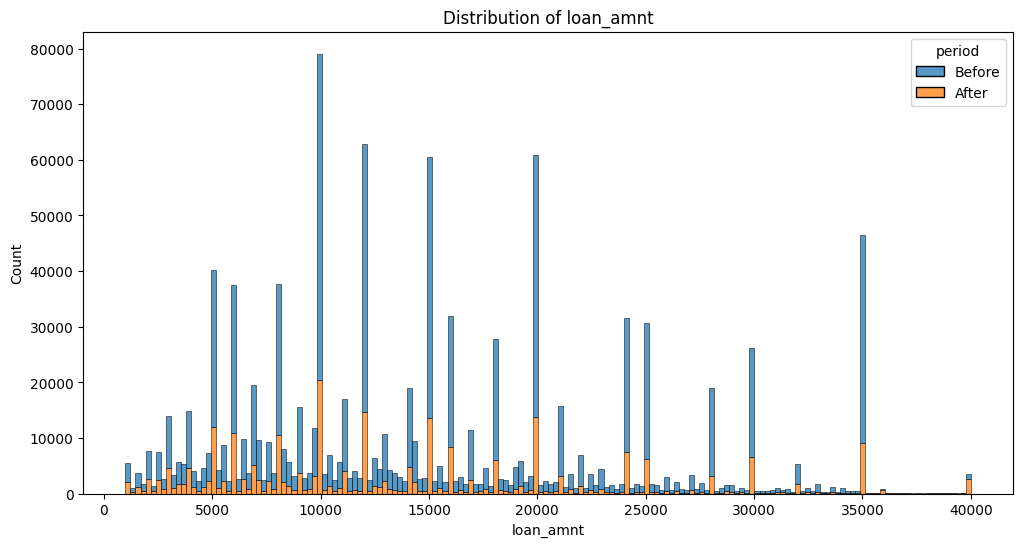


loan_amnt Summary:
           count          mean          std     min     25%      50%      75%  \
period                                                                          
After   264088.0  14298.545277  9026.006029  1000.0  7200.0  12000.0  20000.0   
Before  827043.0  15169.639094  8604.112858  1000.0  8400.0  14000.0  20000.0   

            max  
period           
After   40000.0  
Before  40000.0  


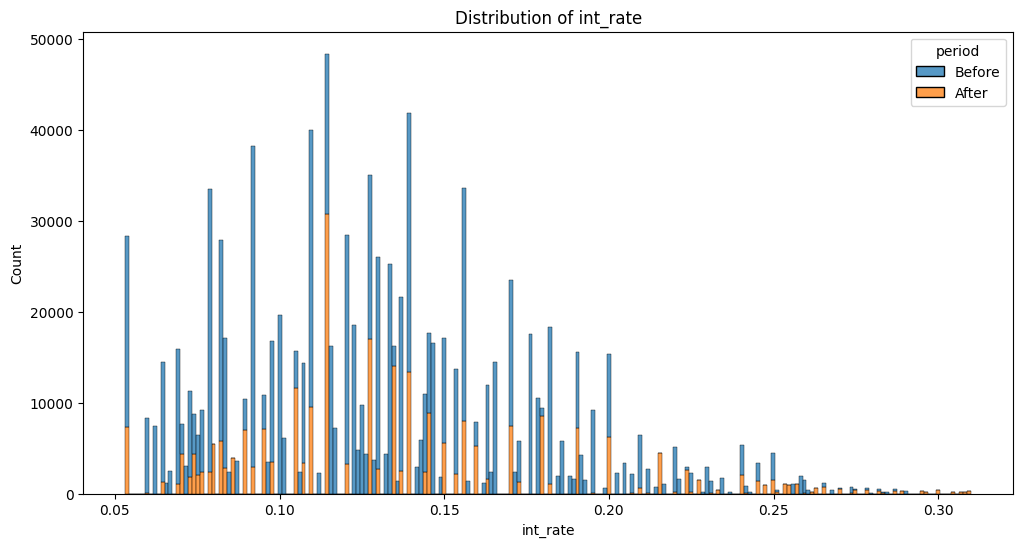


int_rate Summary:
           count      mean       std     min     25%     50%     75%     max
period                                                                      
After   264088.0  0.134131  0.049403  0.0532  0.1049  0.1279  0.1559  0.3099
Before  827043.0  0.129052  0.044715  0.0532  0.0917  0.1269  0.1561  0.2996


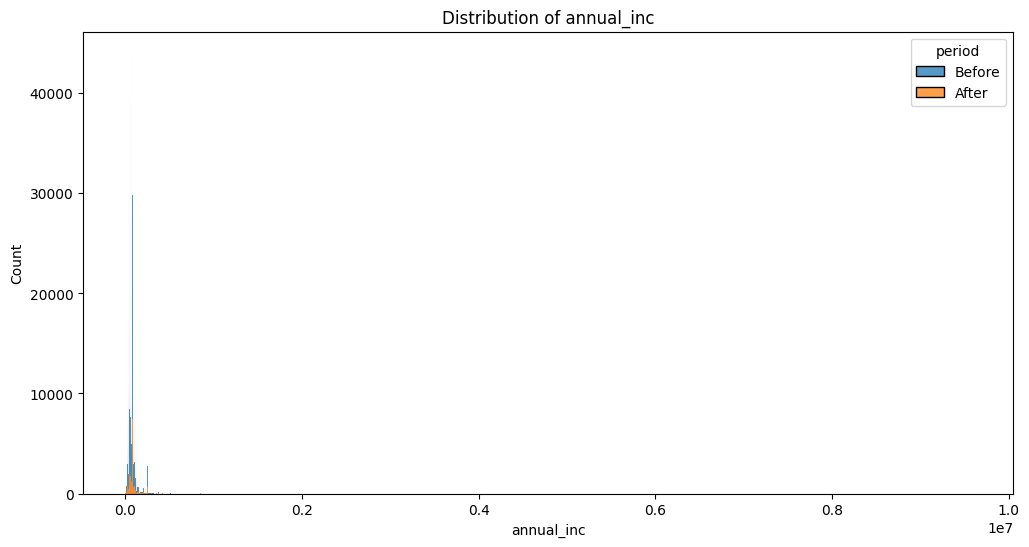


annual_inc Summary:
           count          mean           std  min      25%      50%      75%  \
period                                                                         
After   264088.0  79266.977196  73768.615669  0.0  48000.0  66000.0  95000.0   
Before  827043.0  76959.469070  71165.207758  0.0  46500.0  65000.0  91698.0   

              max  
period             
After   8400000.0  
Before  9573072.0  


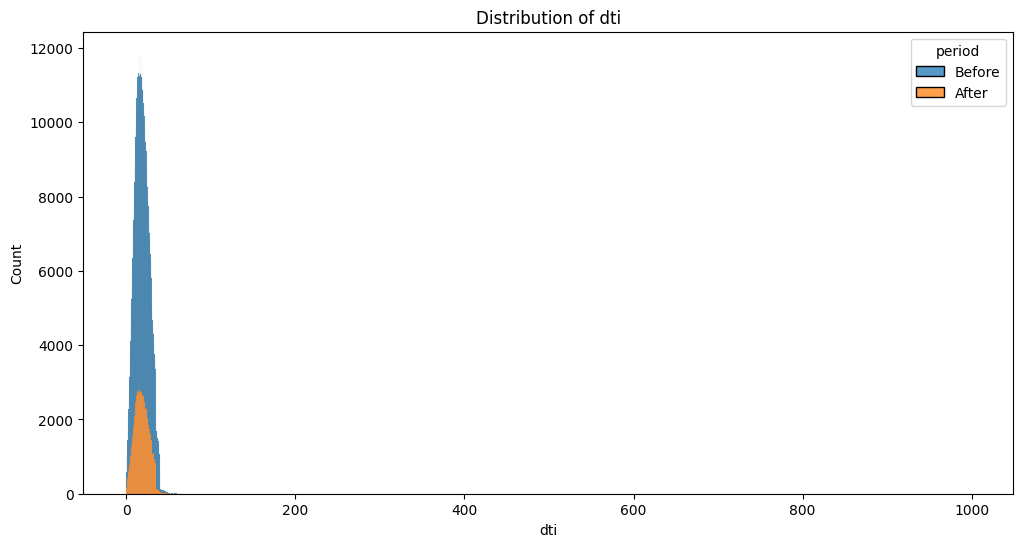


dti Summary:
           count       mean        std  min    25%    50%    75%    max
period                                                                 
After   264050.0  18.476174  10.607937  0.0  12.17  17.96  24.37  999.0
Before  827016.0  18.898561   8.922688 -1.0  12.41  18.31  24.94  999.0


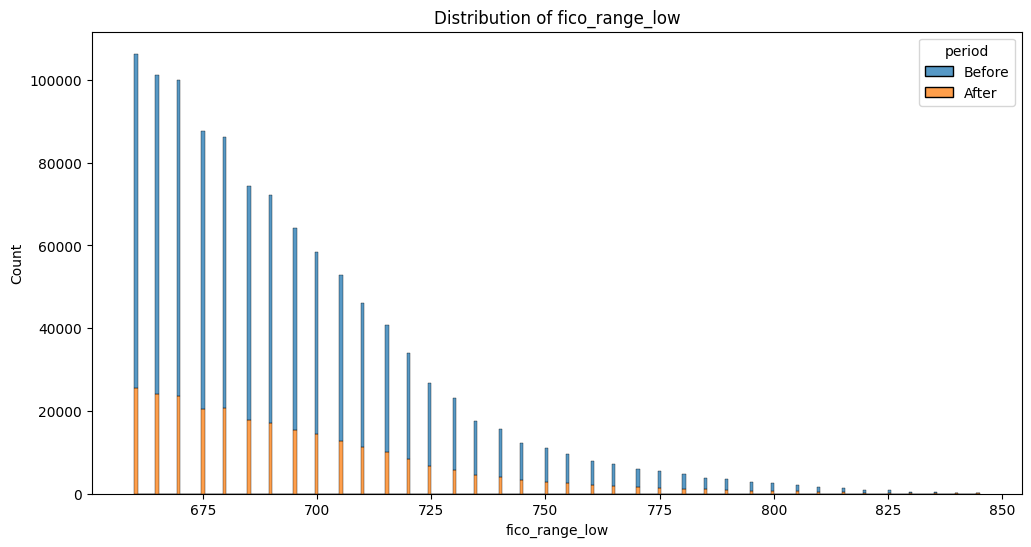


fico_range_low Summary:
           count        mean        std    min    25%    50%    75%    max
period                                                                    
After   264088.0  695.016983  31.171706  660.0  670.0  690.0  710.0  845.0
Before  827043.0  693.792959  30.254400  660.0  670.0  685.0  710.0  845.0


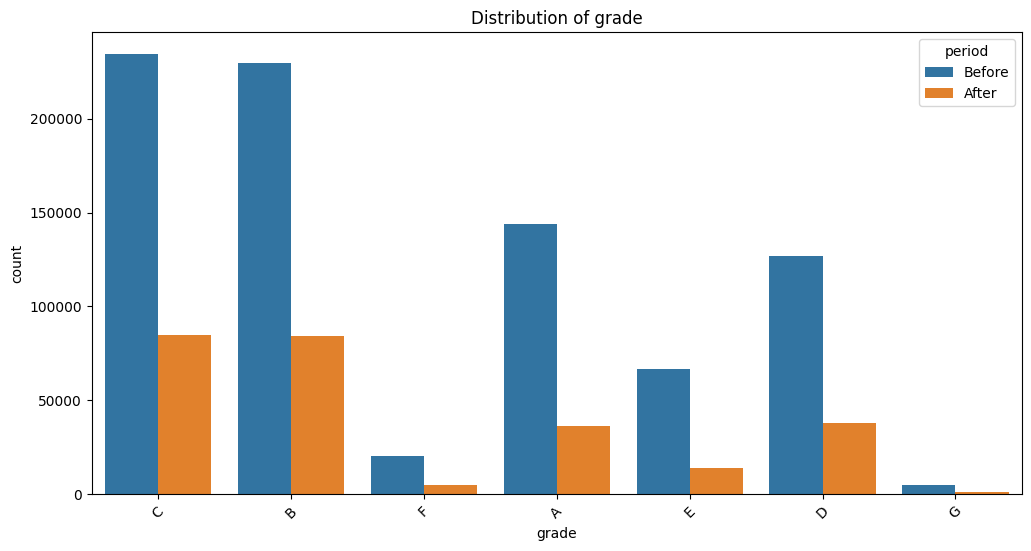


grade Summary:
grade        A       B       C       D      E      F     G
period                                                    
After    36341   84527   84962   37735  14090   5061  1372
Before  143950  229526  234348  127089  66786  20313  5031


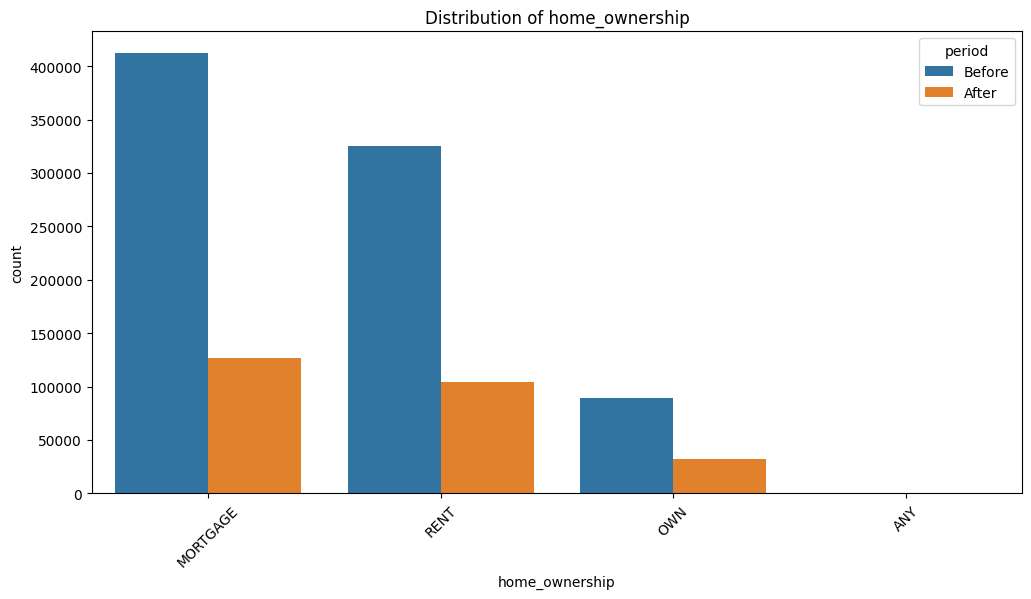


home_ownership Summary:
home_ownership  ANY  MORTGAGE    OWN    RENT
period                                      
After           110    127223  32116  104639
Before            3    411913  89694  325433


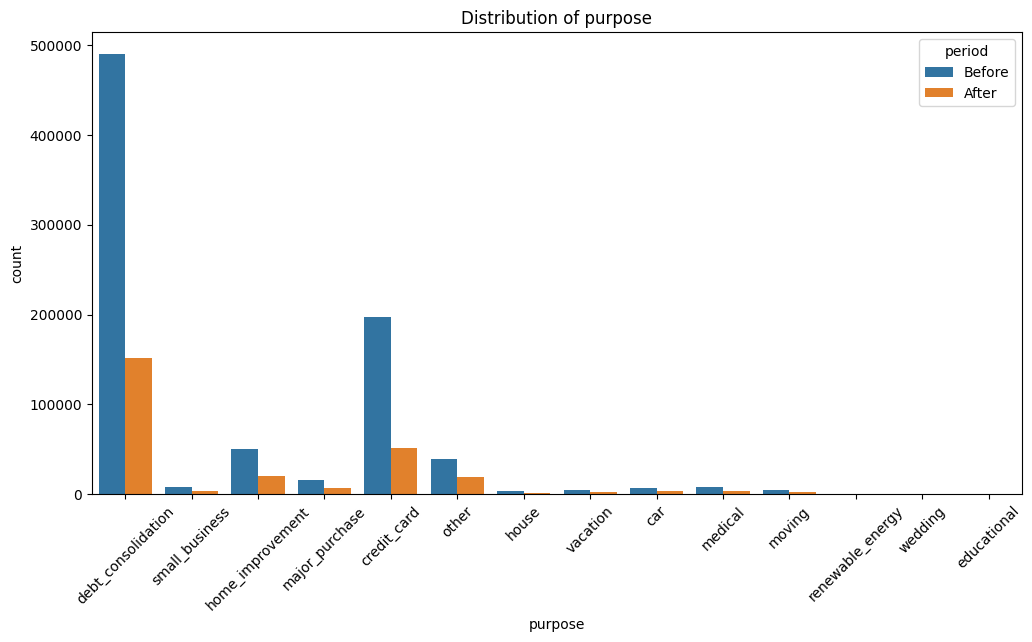


purpose Summary:
purpose   car  credit_card  debt_consolidation  educational  home_improvement  \
period                                                                          
After    3110        51566              151848            0             19799   
Before   7001       197590              490077            1             49721   

purpose  house  major_purchase  medical  moving  other  renewable_energy  \
period                                                                     
After     1273            6581     3557    2177  18733               196   
Before    2917           15132     8152    4800  39311               455   

purpose  small_business  vacation  wedding  
period                                      
After              3000      2246        2  
Before             7431      4443       12  


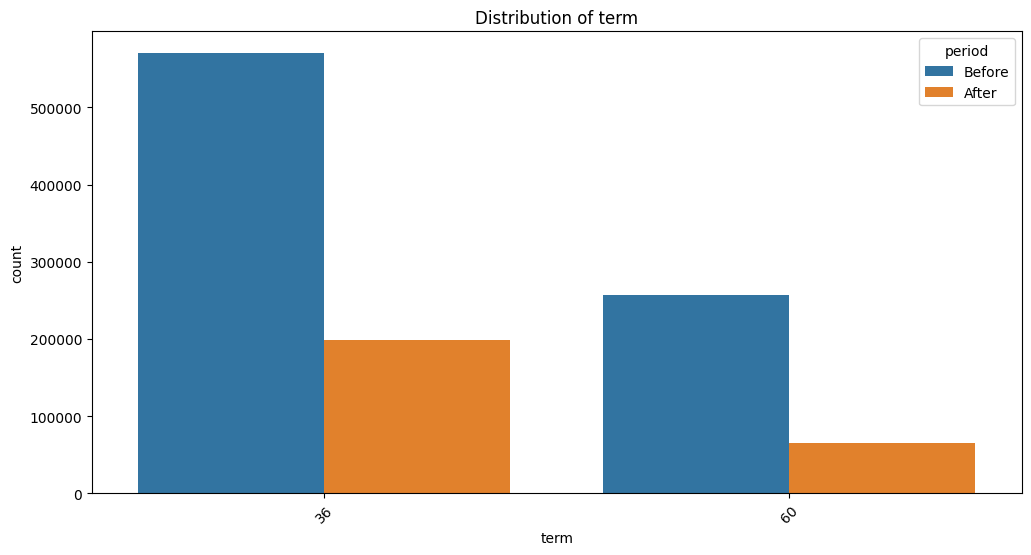


term Summary:
term        36      60
period                
After   199269   64819
Before  569969  257074

Overall Summary:
           loan_amnt  int_rate    annual_inc        dti  fico_range_low
period                                                                 
After   14298.545277  0.134131  79266.977196  18.476174      695.016983
Before  15169.639094  0.129052  76959.469070  18.898561      693.792959


In [49]:
# Load the data


# Convert issue_d to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%Y-%m-%d')

# Define the two periods
before_controversy = df[df['issue_d'] < '2016-05-01']
after_controversy = df[df['issue_d'] >= '2016-05-01']

# Function to analyze and plot a numeric column
def analyze_numeric(column):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=column, hue='period', multiple='stack')
    plt.title(f'Distribution of {column}')
    plt.show()

    print(f"\n{column} Summary:")
    print(df.groupby('period')[column].describe())

# Function to analyze and plot a categorical column
def analyze_categorical(column):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column, hue='period')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

    print(f"\n{column} Summary:")
    print(df.groupby(['period', column]).size().unstack(fill_value=0))

# Add a 'period' column
df['period'] = df['issue_d'].apply(lambda x: 'Before' if x < pd.Timestamp('2016-05-01') else 'After')

# Analyze numeric columns
numeric_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'fico_range_low']
for column in numeric_columns:
    analyze_numeric(column)

# Analyze categorical columns
categorical_columns = ['grade', 'home_ownership', 'purpose', 'term']
for column in categorical_columns:
    analyze_categorical(column)

# Print overall summary
print("\nOverall Summary:")
print(df.groupby('period').agg({
    'loan_amnt': 'mean',
    'int_rate': 'mean',
    'annual_inc': 'mean',
    'dti': 'mean',
    'fico_range_low': 'mean'
}))


In [50]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print(numeric_columns.shape)
print(categorical_columns.shape)

(115,)
(33,)


In [51]:
# Standardize numerical features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

C:\Users\Lawry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Lawry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Lawry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [52]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [53]:
# Standardize the specified columns
columns_for_outlier_detection = ['dti', 'annual_inc', 'delinq_2yrs']
df_outlier = df[columns_for_outlier_detection].copy()
df_outlier = (df_outlier - df_outlier.mean()) / df_outlier.std()

# Sum the standardized columns
df_outlier['sum'] = df_outlier.sum(axis=1)

# Calculate IQR
Q1 = df_outlier['sum'].quantile(0.25)
Q3 = df_outlier['sum'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_outlier[(df_outlier['sum'] < lower_bound) | (df_outlier['sum'] > upper_bound)]

# Calculate the number of rows to remove (1% of total rows)
rows_to_remove = int(0.01 * len(df))

# Sort outliers by their distance from the median
outliers['distance'] = abs(outliers['sum'] - outliers['sum'].median())
outliers_sorted = outliers.sort_values('distance', ascending=False)

# Select the top 1% of outliers
outliers_to_remove = outliers_sorted.head(rows_to_remove)

# Remove outliers from the original dataframe
df_cleaned = df[~df.index.isin(outliers_to_remove.index)]

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")
print(f"Number of outliers removed: {len(df) - len(df_cleaned)}")

C:\Users\Lawry\AppData\Local\Temp\ipykernel_20588\2031672878.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['distance'] = abs(outliers['sum'] - outliers['sum'].median())


Original dataset shape: (1091131, 149)
Cleaned dataset shape: (1080220, 149)
Number of outliers removed: 10911


In [54]:
header_df = pd.DataFrame(columns=df.columns)

# Save the header to a new CSV file
# Replace 'output_header.csv' with your desired output file name
header_df.to_csv('output_header.csv', index=False)

print("Header saved to output_header.csv")

Header saved to output_header.csv


In [55]:
relevant_features = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 
    'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 
    'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 
    'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 
    'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 
    'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 
    'tot_cur_bal', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
    'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
    'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'num_bc_sats', 
    'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
    'num_rev_tl_bal_gt_0', 'num_sats', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 
    'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 
    'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'
]

# Select only the relevant features
df = df[relevant_features]
non_numeric_features = df.select_dtypes(include='object').columns.tolist()
print(non_numeric_features)
print(df.info())
df.to_csv('relevant_features.csv', index=False)


[]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091131 entries, 0 to 1091130
Data columns (total 50 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   loan_amnt                    1091131 non-null  float64
 1   term                         1091131 non-null  float64
 2   int_rate                     1091131 non-null  float64
 3   installment                  1091131 non-null  float64
 4   grade                        1091131 non-null  int64  
 5   sub_grade                    1091131 non-null  int64  
 6   emp_length                   1091131 non-null  int64  
 7   home_ownership               1091131 non-null  int64  
 8   annual_inc                   1091131 non-null  float64
 9   verification_status          1091131 non-null  int64  
 10  dti                          1091066 non-null  float64
 11  delinq_2yrs                  1091131 non-null  float64
 12  fico_range_low               1091131 no

In [56]:
categories = df['verification_status'].unique()

print("Categories in verification_status:", categories)


categories = df['home_ownership'].unique()

print("Categories in home_ownership:", categories)
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids multicollinearity

# Select columns to encode
columns_to_encode = ['verification_status', 'home_ownership']

# Fit and transform the selected columns
encoded_data = encoder.fit_transform(df[columns_to_encode])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Step 3: Drop the original categorical columns and add the encoded columns
df.drop(columns_to_encode, axis=1, inplace=True)  # Drop original columns in-place
df = pd.concat([df, encoded_df], axis=1)  # Add the encoded columns back to the original DataFrame

# Final DataFrame after in-place One-Hot Encoding
print("\nDataFrame after One-Hot Encoding:")
print(df)

Categories in verification_status: [0 1 2]
Categories in home_ownership: [1 3 2 0]

DataFrame after One-Hot Encoding:
         loan_amnt      term  int_rate  installment  grade  sub_grade  \
0        -1.303201 -0.646882  0.209359    -1.251831      2         13   
1         1.117612 -0.646882 -0.225948     1.477153      2         10   
2         0.578378  1.545876 -0.489309    -0.039963      1          8   
3         2.299336  1.545876  0.396541     1.514805      2         14   
4        -0.523034  1.545876  2.050707    -0.598675      5         25   
...            ...       ...       ...          ...    ...        ...   
1091126   1.037300  1.545876 -0.051825     0.393857      2         10   
1091127   1.037300  1.545876 -0.552428     0.285206      1          7   
1091128   2.872988  1.545876 -0.552428     1.630892      1          7   
1091129   1.037300  1.545876  0.318186     0.476284      2         13   
1091130  -0.110004  1.545876  0.318186    -0.444388      2         13   

     

In [57]:



numeric_df = df.select_dtypes(include=[np.number])
scaler = StandardScaler()

# Step 2: Apply the scaler to standardize the numeric columns
# fit_transform() will compute the mean and std for scaling and return the standardized data
standardized_numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Step 3: Replace the original numeric columns in df with the standardized ones
df[numeric_df.columns] = standardized_numeric_df


In [58]:

numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Define a correlation threshold
correlation_threshold = 0.5

# Find features to drop
corr_matrix_abs = corr_matrix.abs()
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))

# Identify features to drop based on high correlation
features_to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]

# Create a report for retained and dropped features
retained_features = df.columns[~df.columns.isin(features_to_drop)]

print("Correlation Analysis Results:")
print("-----------------------------")

# Print strongly correlated feature pairs
print("Strongly correlated feature pairs:")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            print(f"- {corr_matrix.columns[i]} and {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.2f}")

print("\nFeatures to be removed due to high correlation:")
for feature in features_to_drop:
    correlated_features = upper[upper[feature] > correlation_threshold].index.tolist()
    print(f"- {feature} (correlated with: {', '.join(correlated_features)})")

print("\nRetained features:")
print(", ".join(retained_features))
print(retained_features.shape)


df = df[retained_features]

Correlation Analysis Results:
-----------------------------
Strongly correlated feature pairs:
- loan_amnt and installment: 0.95
- int_rate and grade: 0.96
- int_rate and sub_grade: 0.99
- grade and sub_grade: 0.97
- delinq_2yrs and mths_since_last_delinq: -0.56
- fico_range_low and fico_range_high: 1.00
- fico_range_low and bc_open_to_buy: 0.51
- fico_range_high and bc_open_to_buy: 0.51
- mths_since_last_delinq and mths_since_last_major_derog: 0.69
- open_acc and total_acc: 0.71
- open_acc and num_bc_sats: 0.61
- open_acc and num_bc_tl: 0.52
- open_acc and num_op_rev_tl: 0.83
- open_acc and num_rev_accts: 0.65
- open_acc and num_rev_tl_bal_gt_0: 0.67
- open_acc and num_sats: 1.00
- pub_rec and pub_rec_bankruptcies: 0.61
- pub_rec and tax_liens: 0.72
- revol_bal and total_bal_ex_mort: 0.50
- revol_bal and total_bc_limit: 0.50
- revol_util and bc_util: 0.85
- revol_util and percent_bc_gt_75: 0.72
- total_acc and num_bc_tl: 0.62
- total_acc and num_il_tl: 0.67
- total_acc and num_op_rev_

df.info()

In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091131 entries, 0 to 1091130
Data columns (total 25 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1091131 non-null  float64
 1   term                        1091131 non-null  float64
 2   int_rate                    1091131 non-null  float64
 3   emp_length                  1091131 non-null  float64
 4   annual_inc                  1091131 non-null  float64
 5   dti                         1091066 non-null  float64
 6   delinq_2yrs                 1091131 non-null  float64
 7   fico_range_low              1091131 non-null  float64
 8   inq_last_6mths              1091130 non-null  float64
 9   open_acc                    1091131 non-null  float64
 10  pub_rec                     1091131 non-null  float64
 11  revol_bal                   1091131 non-null  float64
 12  revol_util                  1090580 non-null  float64
 1

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Ensure the 'grade_encoded' column is discrete
df['grade_encoded'] = df['grade_encoded'].astype(int)

# Step 1: Scale the data (assuming you already have missing values imputed)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('grade_encoded', axis=1))

# Step 2: Apply Logistic Regression with an increased max_iter
model = LogisticRegression(max_iter=1000)  # Increase iterations to 1000

# Step 3: Apply RFE to select the top 10 features
rfe = RFE(model, n_features_to_select=10)
X_rfe = rfe.fit_transform(df_scaled, df['grade_encoded'])

# Step 4: Check the selected features
selected_features = df.drop('grade_encoded', axis=1).columns[rfe.support_]

In [61]:
# Task 1: Combine employment length into 3 categories
lc["emp_length"] = lc["emp_length"].replace(['< 1 year', '1 year'], '0-1 years')
lc["emp_length"] = lc["emp_length"].replace(['2 years', '3 years', '4 years', '5 years'], '2-5 years')
lc["emp_length"] = lc["emp_length"].replace(['6 years', '7 years', '8 years', '9 years', '10+ years'], '5+ years')

# Task 2: Remove "ANY" category data for home_ownership
lc = lc[lc["home_ownership"] != "ANY"]

# Task 3: Clean other columns: subset and remove rows with missing or invalid data if needed

# Select the required columns
cleaned_columns = [
    'loan_amnt', 'annual_inc', 'dti', 'acc_now_delinq', 'tot_coll_amt',
    'tot_cur_bal', 'total_rev_hi_lim', 'emp_length', 'home_ownership',
    'funded_amnt', 'funded_amnt_inv', 'grade', 'total_rec_int'
]

# Filter out rows with missing values in these columns
lc_cleaned = lc[cleaned_columns].dropna()

# Optional: Convert data types if necessary (for example, ensure 'term' is numeric)
lc_cleaned['term'] = lc_cleaned['term'].str.extract('(\d+)').astype(int)  # Extract numeric part of 'term'

# Display cleaned dataset
lc_cleaned.head()


<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lawry\AppData\Local\Temp\ipykernel_20588\2263756099.py:22: SyntaxWarning: invalid escape sequence '\d'
  lc_cleaned['term'] = lc_cleaned['term'].str.extract('(\d+)').astype(int)  # Extract numeric part of 'term'


,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,emp_length,home_ownership,funded_amnt,funded_amnt_inv,term,installment,total_rec_int
0,3600.0,55000.0,5.91,0.0,722.0,144904.0,9300.0,C,5+ years,MORTGAGE,3600.0,3600.0,36,123.03,821.72
1,24700.0,65000.0,16.06,0.0,0.0,204396.0,111800.0,C,5+ years,MORTGAGE,24700.0,24700.0,36,820.28,979.66
2,20000.0,63000.0,10.78,0.0,0.0,189699.0,14000.0,B,5+ years,MORTGAGE,20000.0,20000.0,60,432.66,2705.92
3,35000.0,110000.0,17.06,0.0,0.0,301500.0,67300.0,C,5+ years,MORTGAGE,35000.0,35000.0,60,829.90,12361.66
4,10400.0,104433.0,25.37,0.0,0.0,331730.0,34000.0,F,2-5 years,MORTGAGE,10400.0,10400.0,60,289.91,1340.50


In [62]:
from sklearn.preprocessing import StandardScaler

# Automatically find numerical columns
numerical_columns = lc_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler and transform the numerical columns
lc_cleaned[numerical_columns] = scaler.fit_transform(lc_cleaned[numerical_columns])

# Display the standardized dataset
lc_cleaned.head()


,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,emp_length,home_ownership,funded_amnt,funded_amnt_inv,term,installment,total_rec_int
0,-1.322309,-0.331003,-1.462507,-0.073466,0.049882,0.003839,-0.654904,C,5+ years,MORTGAGE,-1.322306,-1.322061,-0.657457,-1.267431,-0.718118
1,1.092152,-0.194028,-0.300970,-0.073466,-0.028091,0.378504,2.132949,C,5+ years,MORTGAGE,1.092155,1.093176,-0.657457,1.453106,-0.665523
2,0.554334,-0.221423,-0.905198,-0.073466,-0.028091,0.285946,-0.527071,B,5+ years,MORTGAGE,0.554337,0.555185,1.521012,-0.059313,-0.090667
3,2.270775,0.422361,-0.186533,-0.073466,-0.028091,0.990039,0.922613,C,5+ years,MORTGAGE,2.270778,2.272179,1.521012,1.490641,3.124757
4,-0.544189,0.346107,0.764440,-0.073466,-0.028091,1.180419,0.016901,F,2-5 years,MORTGAGE,-0.544186,-0.543691,1.521012,-0.616297,-0.545361


In [63]:
# ---------------------------------------------------------------- 
# Convert grade to a tertiary variable: A,B = High, DEFG = Low,C = Medium
# Adding a new column to the dataframe called 'grade_tertiary'
# ---------------------------------------------------------------- 

start = datetime.datetime.now()

lc_cleaned['grade_tertiary'] = lc_cleaned['grade'].replace(['A', 'B'], '3.High').replace(['C'], '2.Medium').replace(['D', 'E', 'F', 'G'], '1.Low')
lc_cleaned['grade_tertiary'].value_counts()


# filter out Medium for the grade_tertiary column 
lc2 = lc_cleaned[lc_cleaned['grade_tertiary'] != '2.Medium']

stop = datetime.datetime.now()
print(stop - start)

print(lc_cleaned['grade_tertiary'].value_counts())

print(lc2['grade_tertiary'].value_counts())

lc2.head()
lc_cleaned.head()

0:00:00.466855
grade_tertiary
3.High      466221
2.Medium    300487
1.Low       260265
Name: count, dtype: int64
grade_tertiary
3.High    466221
1.Low     260265
Name: count, dtype: int64


,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,emp_length,home_ownership,funded_amnt,funded_amnt_inv,term,installment,total_rec_int,grade_tertiary
0,-1.322309,-0.331003,-1.462507,-0.073466,0.049882,0.003839,-0.654904,C,5+ years,MORTGAGE,-1.322306,-1.322061,-0.657457,-1.267431,-0.718118,2.Medium
1,1.092152,-0.194028,-0.300970,-0.073466,-0.028091,0.378504,2.132949,C,5+ years,MORTGAGE,1.092155,1.093176,-0.657457,1.453106,-0.665523,2.Medium
2,0.554334,-0.221423,-0.905198,-0.073466,-0.028091,0.285946,-0.527071,B,5+ years,MORTGAGE,0.554337,0.555185,1.521012,-0.059313,-0.090667,3.High
3,2.270775,0.422361,-0.186533,-0.073466,-0.028091,0.990039,0.922613,C,5+ years,MORTGAGE,2.270778,2.272179,1.521012,1.490641,3.124757,2.Medium
4,-0.544189,0.346107,0.764440,-0.073466,-0.028091,1.180419,0.016901,F,2-5 years,MORTGAGE,-0.544186,-0.543691,1.521012,-0.616297,-0.545361,1.Low


In [64]:
start = datetime.datetime.now()

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

to_encode = ['emp_length', 'home_ownership']
lc_encoded = pd.get_dummies(lc2, columns = to_encode)

stop = datetime.datetime.now()
print(stop - start)

lc_encoded.head()


0:00:00.244330


,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,funded_amnt,funded_amnt_inv,term,installment,total_rec_int,grade_tertiary,emp_length_0-1 years,emp_length_2-5 years,emp_length_5+ years,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
2,0.554334,-0.221423,-0.905198,-0.073466,-0.028091,0.285946,-0.527071,B,0.554337,0.555185,1.521012,-0.059313,-0.090667,3.High,False,False,True,True,False,False
4,-0.544189,0.346107,0.764440,-0.073466,-0.028091,1.180419,0.016901,F,-0.544186,-0.543691,1.521012,-0.616297,-0.545361,1.Low,False,True,False,True,False,False
6,0.554334,1.381188,-0.460038,-0.073466,-0.028091,1.360711,1.654254,B,0.554337,0.555185,-0.657457,0.740245,-0.527612,3.High,False,False,True,True,False,False
7,0.554334,0.079923,-0.123593,-0.073466,-0.028091,-0.016962,-0.513471,B,0.554337,0.555185,-0.657457,0.715586,-0.479422,3.High,False,False,True,True,False,False
8,-0.589961,0.079923,-0.643137,-0.073466,0.872707,-0.732662,-0.083734,A,-0.589957,-0.589478,-0.657457,-0.551761,-0.659092,3.High,False,False,True,False,False,True


In [65]:
start = datetime.datetime.now()

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

to_encode2 = ['emp_length', 'home_ownership']
lc_encoded2 = pd.get_dummies(lc_cleaned, columns = to_encode)

stop = datetime.datetime.now()
print(stop - start)

lc_encoded2.head()

0:00:00.271240


,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,funded_amnt,funded_amnt_inv,term,installment,total_rec_int,grade_tertiary,emp_length_0-1 years,emp_length_2-5 years,emp_length_5+ years,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,-1.322309,-0.331003,-1.462507,-0.073466,0.049882,0.003839,-0.654904,C,-1.322306,-1.322061,-0.657457,-1.267431,-0.718118,2.Medium,False,False,True,True,False,False
1,1.092152,-0.194028,-0.300970,-0.073466,-0.028091,0.378504,2.132949,C,1.092155,1.093176,-0.657457,1.453106,-0.665523,2.Medium,False,False,True,True,False,False
2,0.554334,-0.221423,-0.905198,-0.073466,-0.028091,0.285946,-0.527071,B,0.554337,0.555185,1.521012,-0.059313,-0.090667,3.High,False,False,True,True,False,False
3,2.270775,0.422361,-0.186533,-0.073466,-0.028091,0.990039,0.922613,C,2.270778,2.272179,1.521012,1.490641,3.124757,2.Medium,False,False,True,True,False,False
4,-0.544189,0.346107,0.764440,-0.073466,-0.028091,1.180419,0.016901,F,-0.544186,-0.543691,1.521012,-0.616297,-0.545361,1.Low,False,True,False,True,False,False


              precision    recall  f1-score   support

       1.Low       0.91      0.80      0.85     51565
      3.High       0.90      0.96      0.93     93733

    accuracy                           0.90    145298
   macro avg       0.90      0.88      0.89    145298
weighted avg       0.90      0.90      0.90    145298



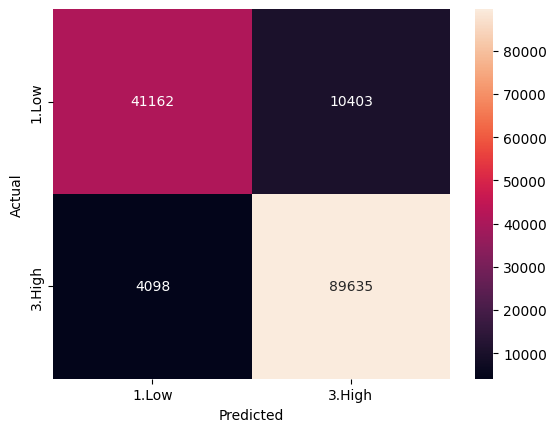

['1.Low' '3.High']


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = lc_encoded.drop(columns = ['grade_tertiary', 'grade'])
y = lc_encoded['grade_tertiary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logit = LogisticRegression(max_iter = 1000)
logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)




# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


# print a labeled confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low', '3.High'], yticklabels=['1.Low', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print(logit.classes_)

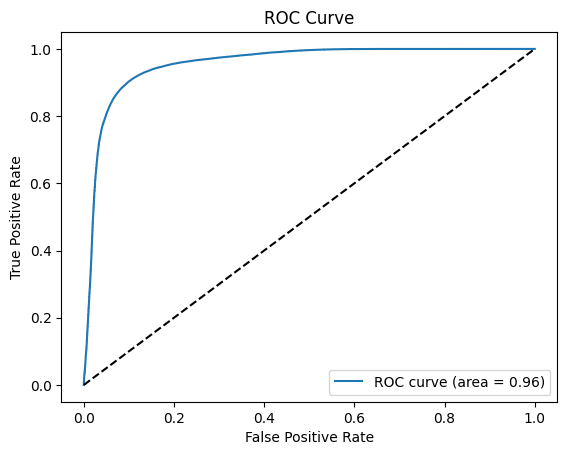

In [67]:
# ---------------------------------------------------
# Add predicted probability to the dataframe
# ---------------------------------------------------

lc_encoded['predicted'] = logit.predict(X)
lc_encoded['predicted_prob'] = logit.predict_proba(X)[:,1]
lc_encoded.head()


# ---------------------------------------------------
# ROC curve
# ---------------------------------------------------

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1], pos_label='3.High')
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

       1.Low       0.89      0.84      0.86     51565
      3.High       0.92      0.94      0.93     93733

    accuracy                           0.91    145298
   macro avg       0.90      0.89      0.90    145298
weighted avg       0.91      0.91      0.91    145298



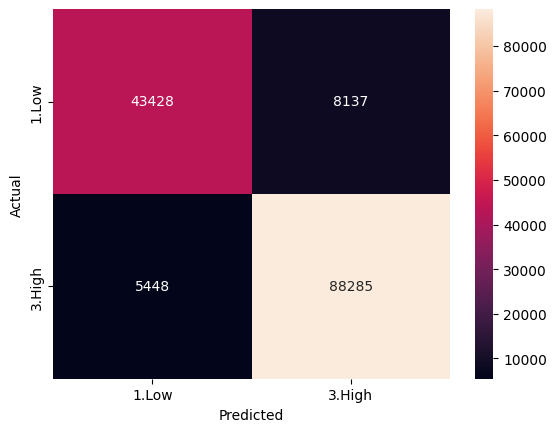

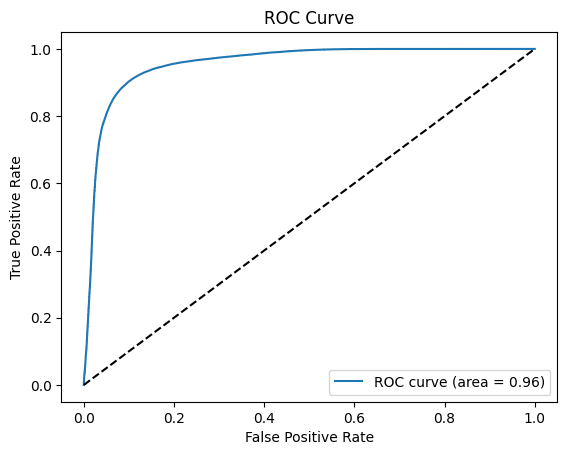

In [68]:
import numpy as np
# Now repeat the above by changing the threshold to 0.6

y_pred_06 = (logit.predict_proba(X_test)[:,1] > 0.6).astype(int)

# # Convert predicted labels back to original label types
y_pred_06 = np.where(y_pred_06 == 1, '3.High', '1.Low')

print(classification_report(y_test, y_pred_06))

cm = confusion_matrix(y_test, y_pred_06)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low', '3.High'], yticklabels=['1.Low', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ---------------------------------------------------
# ROC curve
# ---------------------------------------------------

fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1], pos_label='3.High')
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [69]:
# ---------------------------------------------------
# Losgistic regression sklearn page:https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

# Hyperparameter tuning for logistic regression
# the most important hyperparameter for logistic regression is C, which is the inverse of the regularization strength   
# smaller values of C specify stronger regularization
# Regularization is a technique used to prevent overfitting by penalizing large coefficients
# The default value of C is 1


from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logit = LogisticRegression(max_iter = 1000)
logit_cv = GridSearchCV(logit, param_grid, cv = 5)
logit_cv.fit(X_train, y_train)

print(logit_cv.best_params_)
print(logit_cv.best_score_)
print(logit_cv.best_estimator_)
print(logit_cv.best_index_)
print(logit_cv.best_estimator_.C)



# create a df with the results of the grid search
# This is done to see the results of the grid search
results = pd.DataFrame(logit_cv.cv_results_)
results


{'C': 100}
0.8992838841244037
LogisticRegression(C=100, max_iter=1000)
5
100


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.107750,0.084555,0.172035,0.019456,0.001,{'C': 0.001},0.866335,0.865362,0.867350,0.866247,0.866480,0.866355,0.000633,7
1,0.975808,0.045162,0.155816,0.005095,0.010,{'C': 0.01},0.891034,0.890389,0.891636,0.892108,0.893132,0.891660,0.000936,6
2,0.954734,0.028744,0.146017,0.002460,0.100,{'C': 0.1},0.897013,0.897323,0.898286,0.899154,0.899584,0.898272,0.000999,5
3,0.965618,0.034783,0.146008,0.006223,1.000,{'C': 1},0.897925,0.898286,0.899207,0.899937,0.900505,0.899172,0.000970,4
4,0.963834,0.039514,0.145635,0.001538,10.000,{'C': 10},0.898071,0.898433,0.899284,0.900006,0.900617,0.899282,0.000948,3
5,0.961176,0.026078,0.143032,0.002018,100.000,{'C': 100},0.898080,0.898433,0.899293,0.899997,0.900617,0.899284,0.000945,1
6,0.952692,0.030144,0.144841,0.003382,1000.000,{'C': 1000},0.898080,0.898433,0.899293,0.899997,0.900617,0.899284,0.000945,1


              precision    recall  f1-score   support

       1.Low       0.93      0.79      0.85     51565
      3.High       0.89      0.97      0.93     93733

    accuracy                           0.90    145298
   macro avg       0.91      0.88      0.89    145298
weighted avg       0.90      0.90      0.90    145298



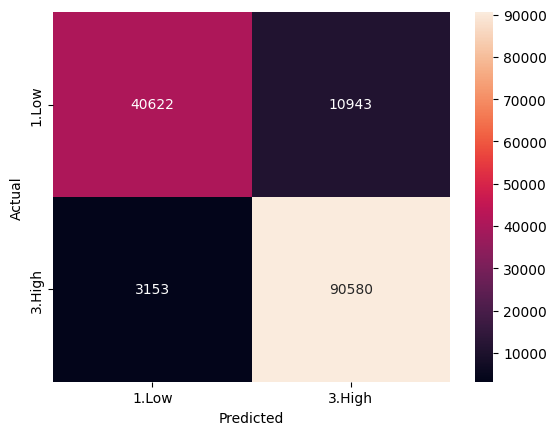

In [70]:
# ---------------------------------------------------
# Replicating the above steps for the KNN classifier
# ---------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low', '3.High'], yticklabels=['1.Low', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ---------------------------------------------------
# hyperparameter tuning for KNN
# ---------------------------------------------------

# param_grid = {'n_neighbors': [5, 7, 9, 11 ]}
# knn = KNeighborsClassifier()
# knn_cv = GridSearchCV(knn, param_grid, cv = 5)

# knn_cv.fit(X_train, y_train)

# print(knn_cv.best_params_)
# print(knn_cv.best_score_)
# print(knn_cv.best_estimator_)

# results = pd.DataFrame(knn_cv.cv_results_)
# results

              precision    recall  f1-score   support

       1.Low       0.91      0.78      0.84     51565
      3.High       0.89      0.96      0.92     93733

    accuracy                           0.89    145298
   macro avg       0.90      0.87      0.88    145298
weighted avg       0.90      0.89      0.89    145298



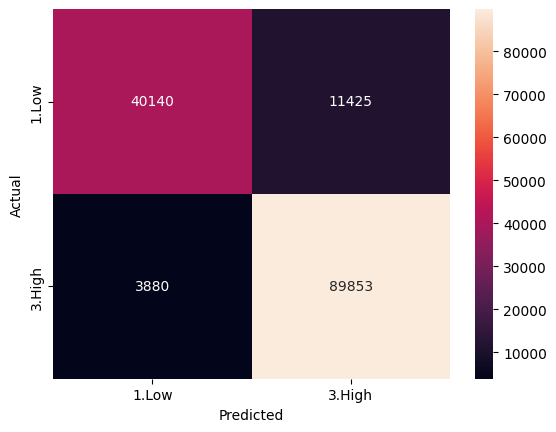

In [71]:
# ---------------------------------------------------
# And now Replicating for the SGD classifier
# ---------------------------------------------------

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log_loss')
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low', '3.High'], yticklabels=['1.Low', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ---------------------------------------------------
# hyperparameter tuning for SGD
# ---------------------------------------------------

# param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
# sgd = SGDClassifier()
# sgd_cv = GridSearchCV(sgd, param_grid, cv = 5)

# sgd_cv.fit(X_train, y_train)

# print(sgd_cv.best_params_)
# print(sgd_cv.best_score_)
# print(sgd_cv.best_estimator_)
# print(sgd_cv.best_index_)
# print(sgd_cv.best_estimator_.alpha)

# results = pd.DataFrame(sgd_cv.cv_results_)
# results



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = lc_encoded2.drop(columns = ['grade_tertiary', 'grade'])
y = lc_encoded2['grade_tertiary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



              precision    recall  f1-score   support

       1.Low       0.73      0.65      0.69     51780
    2.Medium       0.52      0.51      0.51     60293
      3.High       0.76      0.82      0.79     93322

    accuracy                           0.68    205395
   macro avg       0.67      0.66      0.66    205395
weighted avg       0.68      0.68      0.68    205395



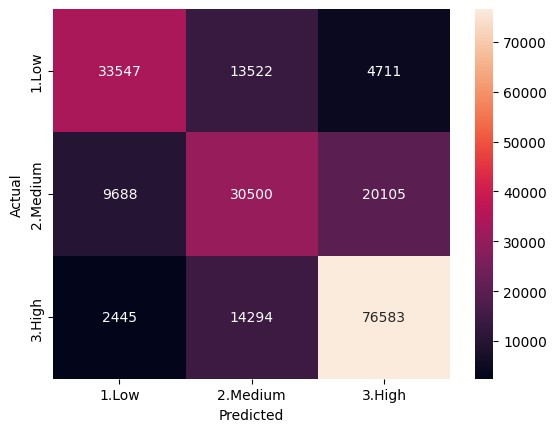

In [77]:
# ---------------------------------------------------
# Replicating the above steps for the KNN classifier
# ---------------------------------------------------
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low','2.Medium', '3.High'], yticklabels=['1.Low','2.Medium', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ---------------------------------------------------
# hyperparameter tuning for KNN
# ---------------------------------------------------

param_grid = {'n_neighbors': [5, 7, 9, 11 ]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)

knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)
print(knn_cv.best_score_)
print(knn_cv.best_estimator_)

results = pd.DataFrame(knn_cv.cv_results_)
results

              precision    recall  f1-score   support

       1.Low       0.65      0.72      0.68     51780
    2.Medium       0.51      0.13      0.21     60293
      3.High       0.66      0.94      0.78     93322

    accuracy                           0.65    205395
   macro avg       0.61      0.60      0.56    205395
weighted avg       0.62      0.65      0.59    205395



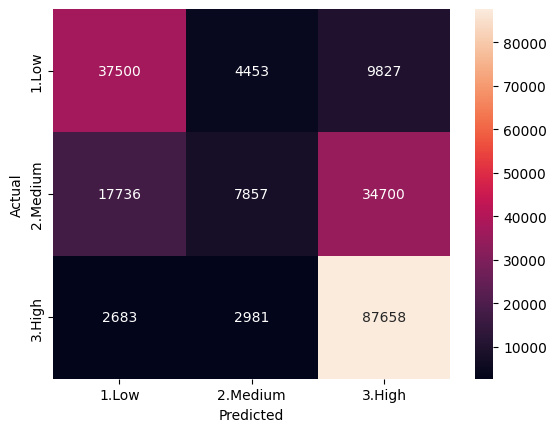

In [75]:
# ---------------------------------------------------
# And now Replicating for the SGD classifier
# ---------------------------------------------------

sgd = SGDClassifier(loss='log_loss')
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low','2.Medium', '3.High'], yticklabels=['1.Low','2.Medium', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ---------------------------------------------------
# hyperparameter tuning for SGD
# ---------------------------------------------------

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
sgd = SGDClassifier()
sgd_cv = GridSearchCV(sgd, param_grid, cv = 5)

sgd_cv.fit(X_train, y_train)

print(sgd_cv.best_params_)
print(sgd_cv.best_score_)
print(sgd_cv.best_estimator_)
print(sgd_cv.best_index_)
print(sgd_cv.best_estimator_.alpha)

results = pd.DataFrame(sgd_cv.cv_results_)
results
